# Multiple linear regression
# FA21BCS044 6A

I have rearranged Dataset columns for convenience in data pre-processing

#Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
dataset = pd.read_csv('Housing2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Labeling Columns with Yes/No categories

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,5]=le.fit_transform(X[:,5])

In [4]:
print(X[0:5,0:])

[[1 0 0 0 1 1 'furnished' 7420 4 2 3 2]
 [1 0 0 0 1 0 'furnished' 8960 4 4 4 3]
 [1 0 1 0 0 1 'semi-furnished' 9960 3 2 2 2]
 [1 0 1 0 1 1 'furnished' 7500 4 2 2 3]
 [1 1 1 0 1 0 'furnished' 7420 4 1 2 2]]


# Encoding the categorical Variable furnishingstatus

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X[0:5,0:])

[[1.0 0.0 0.0 1 0 0 0 1 1 7420 4 2 3 2]
 [1.0 0.0 0.0 1 0 0 0 1 0 8960 4 4 4 3]
 [0.0 1.0 0.0 1 0 1 0 0 1 9960 3 2 2 2]
 [1.0 0.0 0.0 1 0 1 0 1 1 7500 4 2 2 3]
 [1.0 0.0 0.0 1 1 1 0 1 0 7420 4 1 2 2]]


# Splitting the dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#Comparing predicted values and test data values





In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4143699.2   4403000.  ]
 [ 6661197.08  7350000.  ]
 [ 5722054.    5250000.  ]
 [ 5326517.21  4550000.  ]
 [ 4831442.87  4382000.  ]
 [ 4069360.35  4690000.  ]
 [ 8056958.1   8540000.  ]
 [ 5730070.17  5250000.  ]
 [ 3497755.69  2730000.  ]
 [ 5656737.45  5950000.  ]
 [ 3007238.81  3675000.  ]
 [ 6228868.54  6650000.  ]
 [ 4634454.99  2380000.  ]
 [ 7313434.75  5943000.  ]
 [ 5686360.38  5600000.  ]
 [ 6851266.51  4970000.  ]
 [ 8168306.94 12215000.  ]
 [ 4393064.17  4340000.  ]
 [ 6030273.97  7875000.  ]
 [ 4874126.78  5950000.  ]
 [ 4247412.32  3143000.  ]
 [ 2736529.66  3990000.  ]
 [ 4520239.27  4473000.  ]
 [ 3675698.98  2870000.  ]
 [ 2713706.04  3465000.  ]
 [ 3408037.1   2653000.  ]
 [ 5194163.01  4480000.  ]
 [ 6510696.8   6195000.  ]
 [ 6477903.6   3920000.  ]
 [ 5026480.65  9100000.  ]
 [ 3139466.6   2660000.  ]
 [ 4554147.98  3500000.  ]
 [ 3008821.69  3360000.  ]
 [ 2746228.36  1890000.  ]
 [ 4947249.97  4830000.  ]
 [ 4625625.58  4200000.  ]
 [ 4621248.57  4200000.  ]
 

In [10]:
print(regressor.coef_)

[ 1.16e+05  1.26e+05 -2.42e+05  5.83e+05  3.51e+05  2.49e+05  9.80e+05
  7.72e+05  6.86e+05  2.39e+02  1.08e+05  1.10e+06  4.18e+05  2.34e+05]


<ipython-input-11-82c50a740027>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins = 20)


Text(0.5, 0, 'Errors')

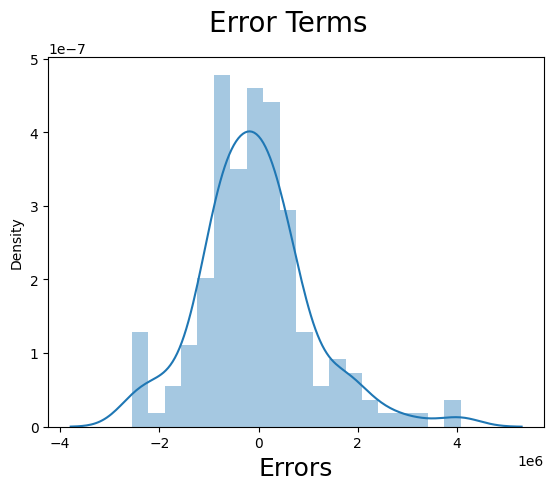

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6729582743459914